In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import time
from scipy.signal import find_peaks
from scipy.stats import gamma
import statsmodels.api as sm
import warnings

In [3]:
train = pd.read_csv("/Users/dharanisrinivas/Desktop/IOT_CIA-2/Dataset/train_ML_IOT.csv")
test = pd.read_csv("/Users/dharanisrinivas/Desktop/IOT_CIA-2/Dataset/test_ML_IOT.csv")

In [4]:
test_ID = test["ID"]
test.drop(["ID"],axis = 1,inplace=True)

In [5]:
test['DateTime'] = pd.to_datetime(test['DateTime'])

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 184.6 KB


In [7]:
test['DateTime'] = pd.to_datetime(test['DateTime'])
test['Weekday'] = [datetime.weekday(date) for date in test.DateTime]
test['Year'] = [date.year for date in test.DateTime]
test['Month'] = [date.month for date in test.DateTime]
test['Day'] = [date.day for date in test.DateTime]
test['Hour'] = [date.hour for date in test.DateTime]
test['Week'] = [date.week for date in test.DateTime]
test['Quarter'] = [date.quarter for date in test.DateTime]
test["IsWeekend"] = test["Weekday"] >= 5

In [8]:
train

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [9]:
test

,DateTime,Junction,Weekday,Year,Month,Day,Hour,Week,Quarter,IsWeekend
0,2017-07-01 00:00:00,1,5,2017,7,1,0,26,3,True
1,2017-07-01 01:00:00,1,5,2017,7,1,1,26,3,True
2,2017-07-01 02:00:00,1,5,2017,7,1,2,26,3,True
3,2017-07-01 03:00:00,1,5,2017,7,1,3,26,3,True
4,2017-07-01 04:00:00,1,5,2017,7,1,4,26,3,True
...,...,...,...,...,...,...,...,...,...,...
11803,2017-10-31 19:00:00,4,1,2017,10,31,19,44,4,False
11804,2017-10-31 20:00:00,4,1,2017,10,31,20,44,4,False
11805,2017-10-31 21:00:00,4,1,2017,10,31,21,44,4,False
11806,2017-10-31 22:00:00,4,1,2017,10,31,22,44,4,False


In [10]:
train['DateTime'] = pd.to_datetime(train['DateTime'])
train['Weekday'] = [datetime.weekday(date) for date in train.DateTime]
train['Year'] = [date.year for date in train.DateTime]
train['Month'] = [date.month for date in train.DateTime]
train['Day'] = [date.day for date in train.DateTime]
train['Hour'] = [date.hour for date in train.DateTime]
train['Week'] = [date.week for date in train.DateTime]
train['Quarter'] = [date.quarter for date in train.DateTime]
train["IsWeekend"] = train["Weekday"] >= 5

train.head(10)

,DateTime,Junction,Vehicles,ID,Weekday,Year,Month,Day,Hour,Week,Quarter,IsWeekend
0,2015-11-01 00:00:00,1,15,20151101001,6,2015,11,1,0,44,4,True
1,2015-11-01 01:00:00,1,13,20151101011,6,2015,11,1,1,44,4,True
2,2015-11-01 02:00:00,1,10,20151101021,6,2015,11,1,2,44,4,True
3,2015-11-01 03:00:00,1,7,20151101031,6,2015,11,1,3,44,4,True
4,2015-11-01 04:00:00,1,9,20151101041,6,2015,11,1,4,44,4,True
5,2015-11-01 05:00:00,1,6,20151101051,6,2015,11,1,5,44,4,True
6,2015-11-01 06:00:00,1,9,20151101061,6,2015,11,1,6,44,4,True
7,2015-11-01 07:00:00,1,8,20151101071,6,2015,11,1,7,44,4,True
8,2015-11-01 08:00:00,1,11,20151101081,6,2015,11,1,8,44,4,True
9,2015-11-01 09:00:00,1,12,20151101091,6,2015,11,1,9,44,4,True


In [11]:
train

,DateTime,Junction,Vehicles,ID,Weekday,Year,Month,Day,Hour,Week,Quarter,IsWeekend
0,2015-11-01 00:00:00,1,15,20151101001,6,2015,11,1,0,44,4,True
1,2015-11-01 01:00:00,1,13,20151101011,6,2015,11,1,1,44,4,True
2,2015-11-01 02:00:00,1,10,20151101021,6,2015,11,1,2,44,4,True
3,2015-11-01 03:00:00,1,7,20151101031,6,2015,11,1,3,44,4,True
4,2015-11-01 04:00:00,1,9,20151101041,6,2015,11,1,4,44,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,4,2017,6,30,19,26,2,False
48116,2017-06-30 20:00:00,4,30,20170630204,4,2017,6,30,20,26,2,False
48117,2017-06-30 21:00:00,4,16,20170630214,4,2017,6,30,21,26,2,False
48118,2017-06-30 22:00:00,4,22,20170630224,4,2017,6,30,22,26,2,False


In [12]:
#train = pd.read_csv("../input/ml-iot/train_ML_IOT.csv")
print(train.info(),"\n")
print("Null data amount:\n",train.isna().sum(),"\n\n")
print(train.head(10),"\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DateTime   48120 non-null  datetime64[ns]
 1   Junction   48120 non-null  int64         
 2   Vehicles   48120 non-null  int64         
 3   ID         48120 non-null  int64         
 4   Weekday    48120 non-null  int64         
 5   Year       48120 non-null  int64         
 6   Month      48120 non-null  int64         
 7   Day        48120 non-null  int64         
 8   Hour       48120 non-null  int64         
 9   Week       48120 non-null  int64         
 10  Quarter    48120 non-null  int64         
 11  IsWeekend  48120 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(10)
memory usage: 4.1 MB
None 

Null data amount:
 DateTime     0
Junction     0
Vehicles     0
ID           0
Weekday      0
Year         0
Month        0
Day          0
Hour         0
Week 

In [13]:
sns.set(rc={'figure.figsize':(16, 9)})

In [14]:
j1=train[train["Junction"]==1]
j2=train[train["Junction"]==2]
j3=train[train["Junction"]==3]
j4=train[train["Junction"]==4]

js = [j1, j2, j3, j4]

In [15]:
a = 1
for j in js:
    print("Junction # ",a)
    print("Mean: ",j['Vehicles'].mean())
    print("Median: ",j['Vehicles'].median())
    print("Min: ",j['Vehicles'].min())
    print("Max: ",j['Vehicles'].max())
    print("Std: ",j['Vehicles'].std())
    print("Skewness: ",j['Vehicles'].skew())
    print("Kurtosis: ",j['Vehicles'].kurt(),"\n\n")
    a+=1

Junction #  1
Mean:  45.05290570175438
Median:  40.0
Min:  5
Max:  156
Std:  23.0083451392927
Skewness:  0.8012975778113662
Kurtosis:  0.19188209363777453 


Junction #  2
Mean:  14.253220942982455
Median:  13.0
Min:  1
Max:  48
Std:  7.401306635266316
Skewness:  1.2873364898588882
Kurtosis:  1.783596555414265 


Junction #  3
Mean:  13.694010416666666
Median:  11.0
Min:  1
Max:  180
Std:  10.436005075710996
Skewness:  3.490206183724324
Kurtosis:  27.36437504960055 


Junction #  4
Mean:  7.251611418047882
Median:  7.0
Min:  1
Max:  36
Std:  3.5214545458330613
Skewness:  1.3326967458513121
Kurtosis:  4.737325243604408 




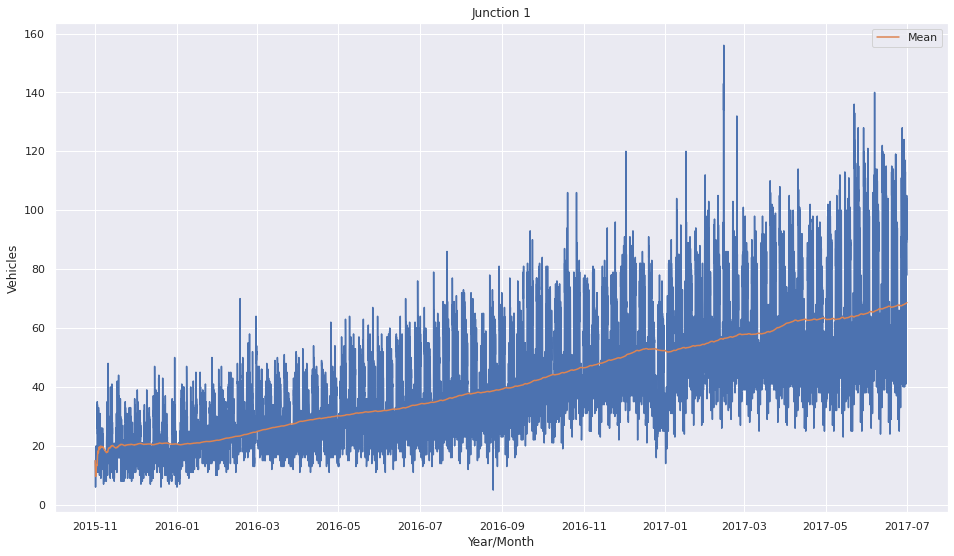

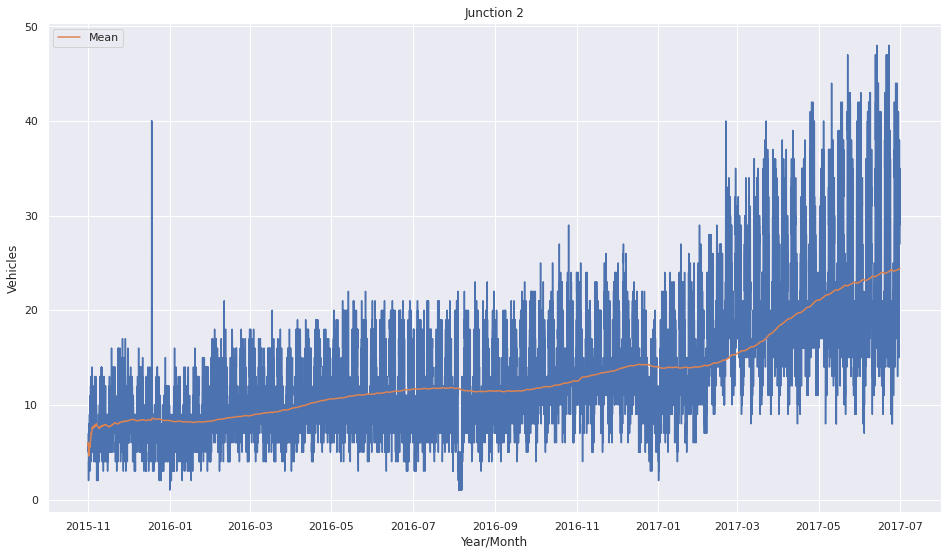

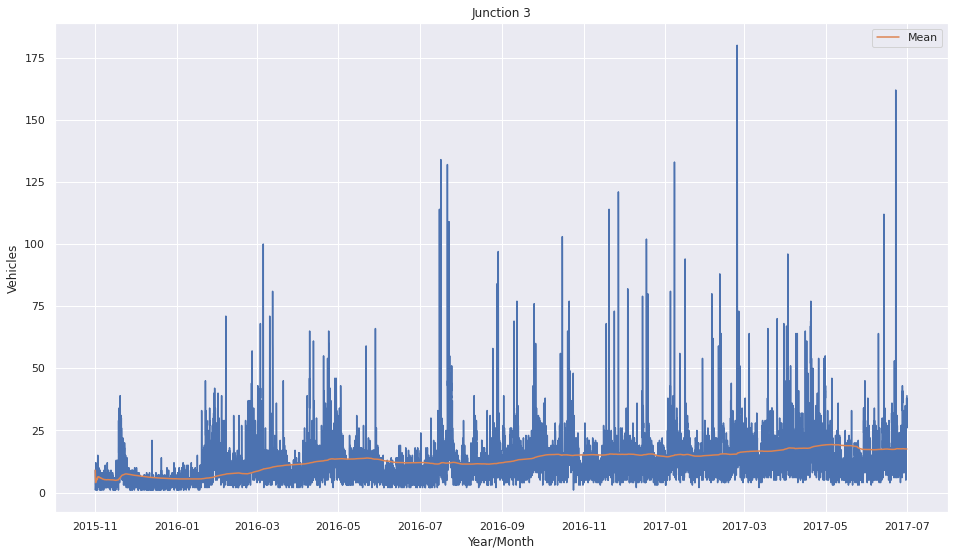

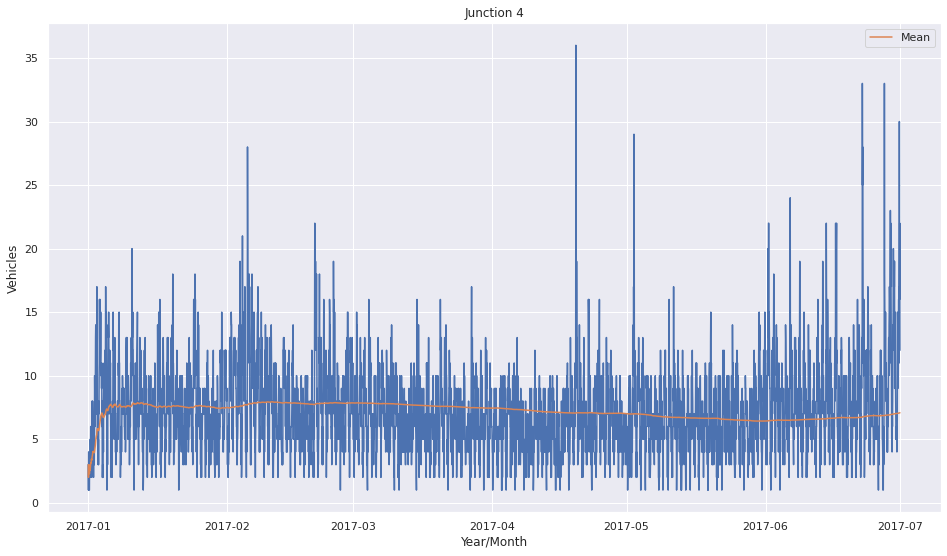

In [16]:
for i,j in enumerate(js):
    plt.title('Junction %d' %(i+1))
    plt.plot(j.DateTime, j.Vehicles)
    plt.plot(j.DateTime, j.Vehicles.rolling(2160,min_periods=1).mean(), label = "Mean")
    plt.xlabel("Year/Month")
    plt.ylabel("Vehicles")
    plt.legend()
    plt.show()
    print()

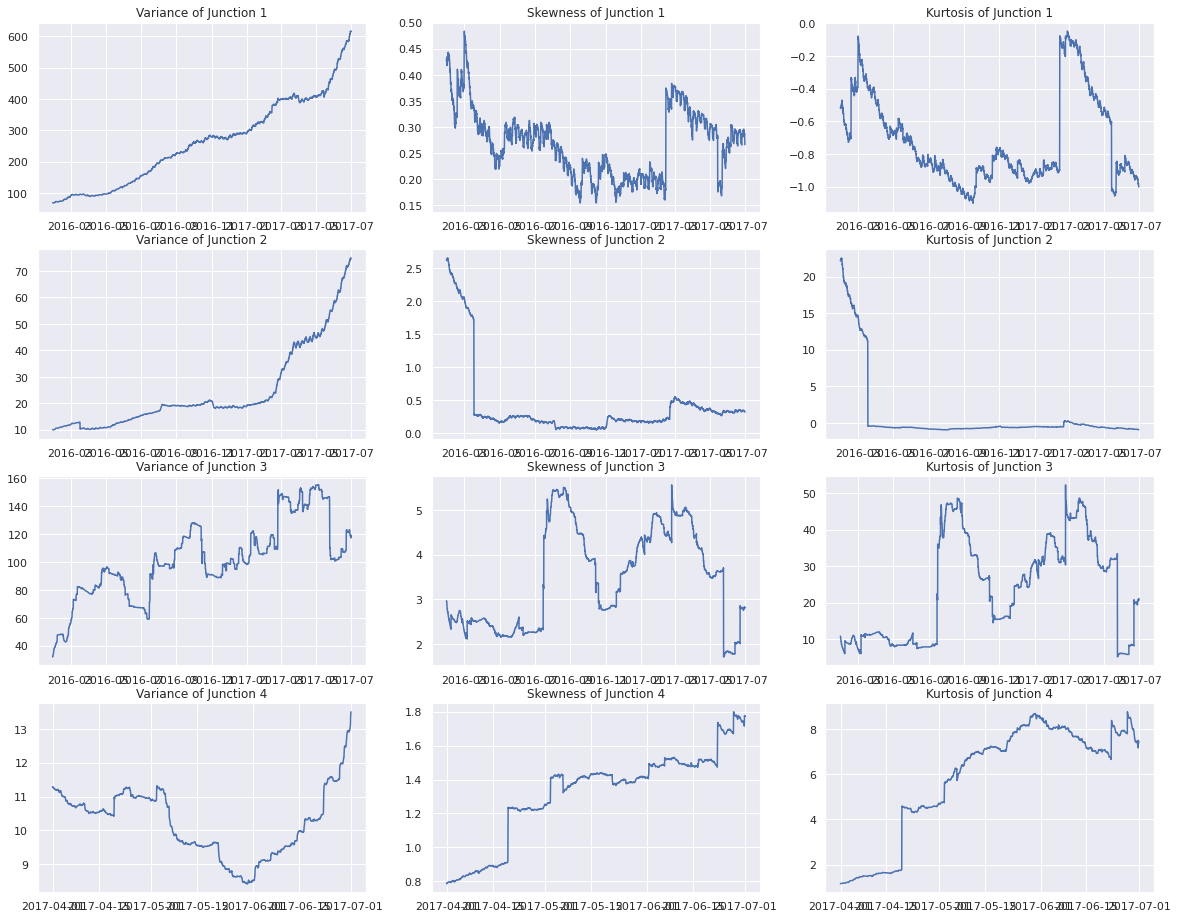

In [17]:
sns.set(rc={'figure.figsize':(20, 16)})
fig, axs = plt.subplots(4,3)
for i,j in enumerate(js):
    axs[i,0].plot(j.DateTime, j.Vehicles.rolling(2160).var())
    axs[i,0].title.set_text("Variance of Junction %d" %(i+1))
    
    axs[i,1].plot(j.DateTime, j.Vehicles.rolling(2160).skew())
    axs[i,1].title.set_text("Skewness of Junction %d" %(i+1))
    
    axs[i,2].plot(j.DateTime, j.Vehicles.rolling(2160).kurt())
    axs[i,2].title.set_text("Kurtosis of Junction %d" %(i+1))

In [18]:
b1=j1.groupby(["Month", "Quarter"]).sum()[["Vehicles"]].sort_values(by="Vehicles", ascending = False)
b1["junction"] = 1
b1 = b1.reset_index()

b2=j2.groupby(["Month", "Quarter"]).sum()[["Vehicles"]].sort_values(by="Vehicles", ascending = False)
b2["junction"] = 2
b2 = b2.reset_index()

b3=j3.groupby(["Month", "Quarter"]).sum()[["Vehicles"]].sort_values(by="Vehicles", ascending = False)
b3["junction"] = 3
b3 = b3.reset_index()

b4=j4.groupby(["Month", "Quarter"]).sum()[["Vehicles"]].sort_values(by="Vehicles", ascending = False)
b4["junction"] = 4
b4 = b4.reset_index()

In [19]:
bubble=pd.concat([b1, b2, b3, b4], axis=0)
bubble.reset_index(drop = True)

,Month,Quarter,Vehicles,junction
0,6,2,79314,1
1,5,2,77227,1
2,3,1,69326,1
3,4,2,67486,1
4,2,1,62929,1
5,1,1,61379,1
6,12,4,54899,1
7,11,4,52958,1
8,10,4,37224,1
9,9,3,34374,1


In [20]:
fig = px.scatter(bubble, x="Month", y="Quarter",size="Vehicles", color="junction",
                 hover_name="junction", log_x=True, size_max=60)
fig.show()

In [21]:
b1=j1.groupby(["Weekday","Quarter"]).sum()[["Vehicles"]].sort_values(by="Vehicles", ascending = False)
b1["junction"] = 1
b1 = b1.reset_index()

b2=j2.groupby(["Weekday","Quarter"]).sum()[["Vehicles"]].sort_values(by="Vehicles", ascending = False)
b2["junction"] = 2
b2 = b2.reset_index()

b3=j3.groupby(["Weekday","Quarter"]).sum()[["Vehicles"]].sort_values(by="Vehicles", ascending = False)
b3["junction"] = 3
b3 = b3.reset_index()

b4=j4.groupby(["Weekday","Quarter"]).sum()[["Vehicles"]].sort_values(by="Vehicles", ascending = False)
b4["junction"] = 4
b4 = b4.reset_index()


In [22]:
bubble=pd.concat([b1, b2, b3, b4], axis=0)
bubble.reset_index(drop = True)

,Weekday,Quarter,Vehicles,junction
0,1,2,37120,1
1,3,2,36410,1
2,2,2,36119,1
3,0,2,35013,1
4,4,2,33125,1
...,...,...,...,...
93,0,2,2111,4
94,5,1,1980,4
95,5,2,1948,4
96,6,1,1933,4


In [23]:
fig = px.scatter(bubble, x="Weekday", y="Quarter",size="Vehicles", color="junction",
                 hover_name="junction", log_x=True, size_max=60)
fig.show()

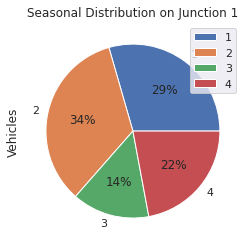

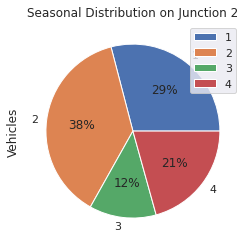

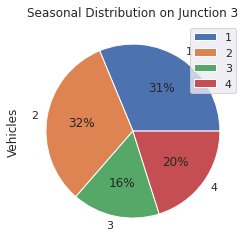

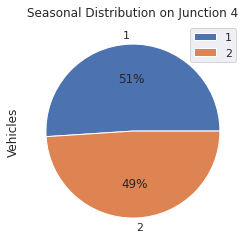

In [24]:
for i,j in enumerate(js):
    j.groupby(['Quarter']).sum().plot(kind='pie', y='Vehicles',
                                      autopct='%1.0f%%', title='Seasonal Distribution on Junction %d' %(i+1),
                                      figsize=(4, 4))

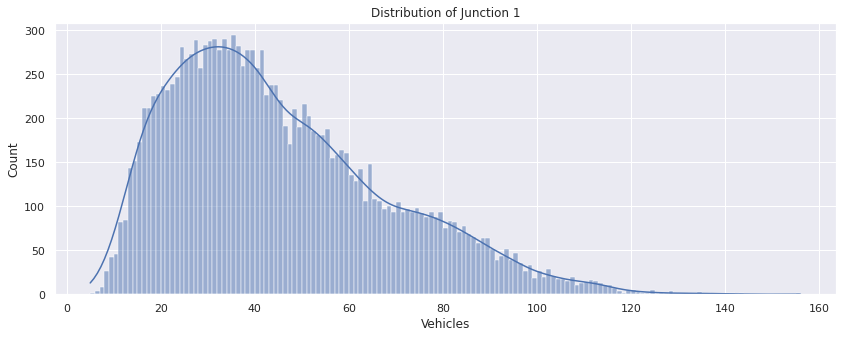

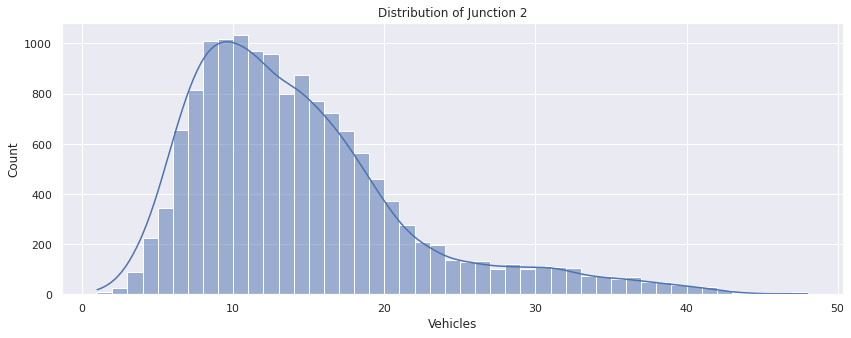

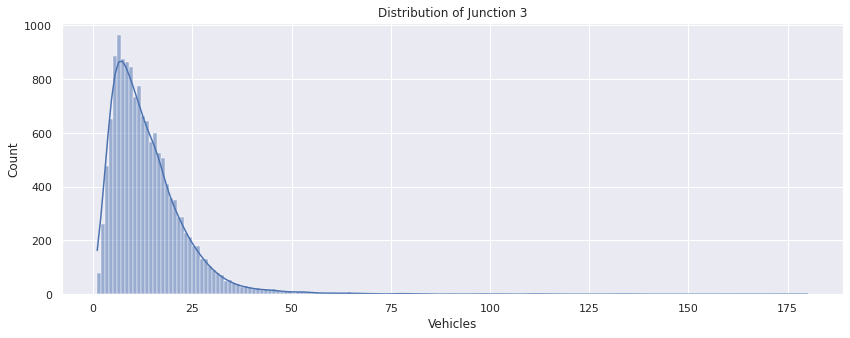

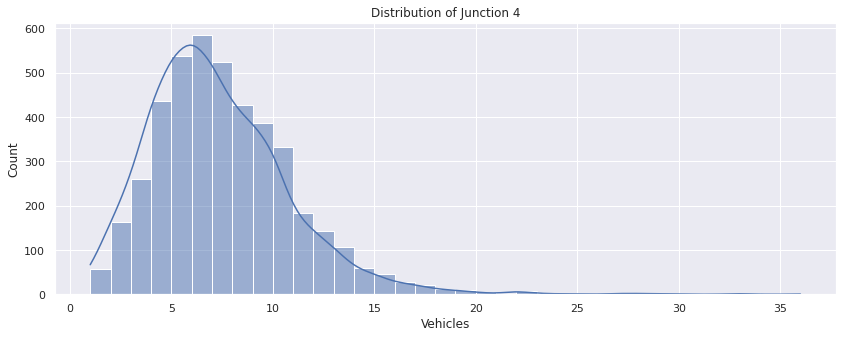

In [25]:
for i,j in enumerate(js):
    sns.set(rc={'figure.figsize':(14,5)})
    sns.histplot(j.Vehicles,binwidth=1,kde=True).set(title="Distribution of Junction %d" %(i+1))
    plt.show()

Junction # 1
weekday vehicle mean 49.76685823754789
weekend vehicle mean 33.19990366088632

Junction # 2
weekday vehicle mean 15.834291187739463
weekend vehicle mean 10.277697495183045

Junction # 3
weekday vehicle mean 13.793199233716475
weekend vehicle mean 13.44460500963391

Junction # 4
weekday vehicle mean 7.648397435897436
weekend vehicle mean 6.240196078431373



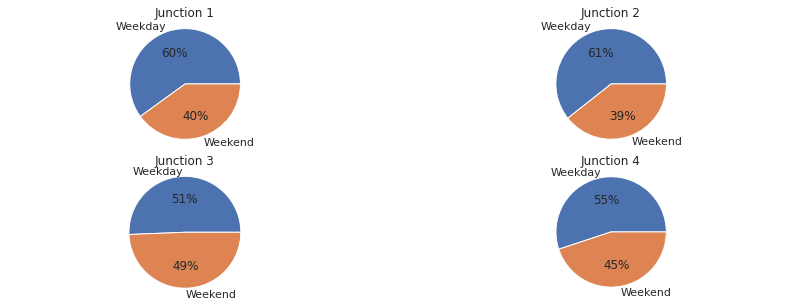

In [26]:
fig, axs = plt.subplots(2,2)
for i,j in enumerate(js):
    print("Junction #", i+1)
    weekday = j[j["Weekday"] < 5].Vehicles.mean()
    weekend = j[j["Weekday"] >= 5].Vehicles.mean()
    
    labels = ['Weekday', 'Weekend']
    sizes = [weekday, weekend]
    
    axs[int(i>=2),i%2].pie(sizes, labels=labels, autopct='%1.0f%%')
    axs[int(i>=2),i%2].axis('equal')
    axs[int(i>=2),i%2].title.set_text("Junction %d" %(i+1))
    #plt.show()
    
    print("weekday vehicle mean",j[j["Weekday"] < 5].Vehicles.mean())
    print("weekend vehicle mean", j[j["Weekday"] >= 5].Vehicles.mean())
    
    print()

In [27]:
acfs = []
for i,j in enumerate(js):
    acfs.append(sm.tsa.acf(j.Vehicles, nlags =1200))

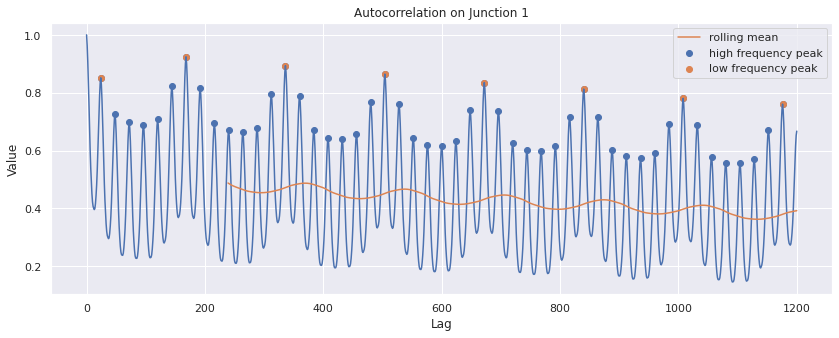

[144 168 168 168 168 168 168]
[24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24]


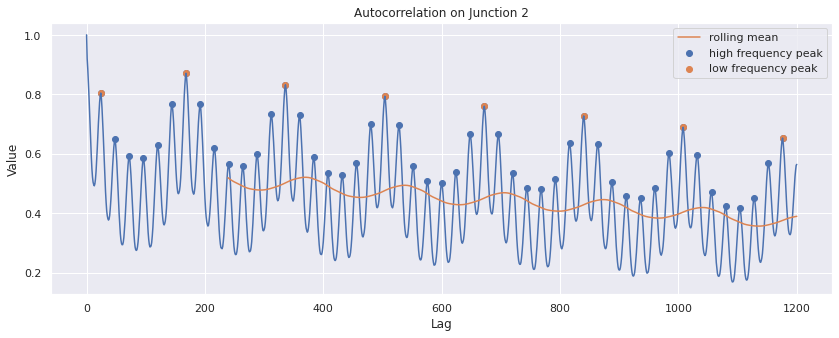

[144 168 168 168 168 168 168]
[24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24]


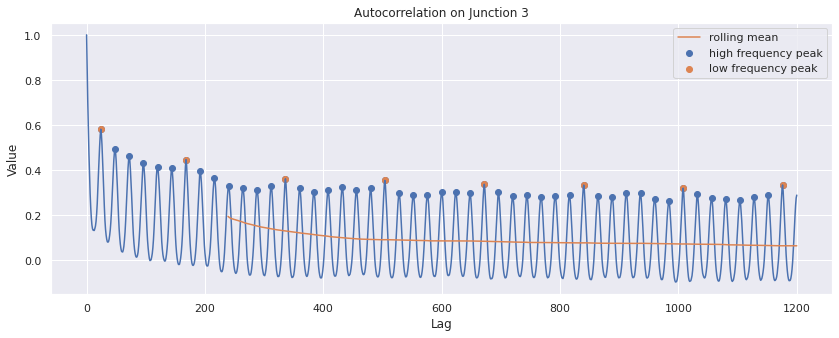

[144 168 168 168 168 168 168]
[24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24]


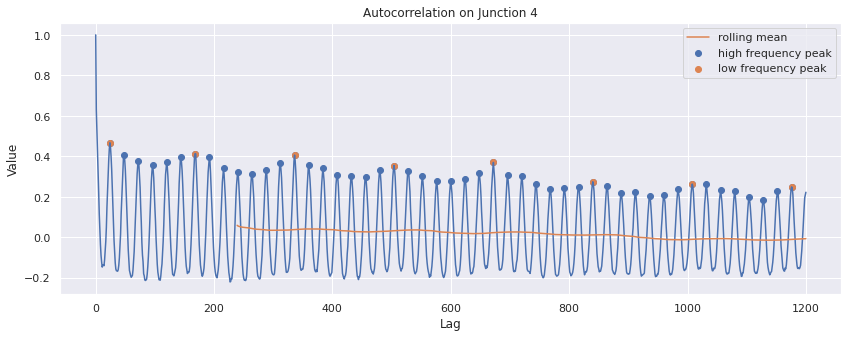

[144 168 168 168 168 168 168]
[24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24]


In [28]:
from scipy.signal import find_peaks
sns.set()
for i,ac in enumerate(acfs):
    pks_lowfreq, _ = find_peaks(ac, distance=135)
    pks_highfreq, _ = find_peaks(ac, distance=15)
    plt.title("Autocorrelation on Junction %d" %(i+1))
    plt.plot(ac)
    plt.xlabel("Lag")
    plt.ylabel("Value")
    plt.plot(pd.Series(ac).rolling(240).mean(), label="rolling mean")
    plt.scatter(pks_highfreq,ac[pks_highfreq], label = "high frequency peak")
    plt.scatter(pks_lowfreq,ac[pks_lowfreq], label = "low frequency peak")
    plt.legend()
    plt.show()
    print(np.diff(pks_lowfreq))
    print(np.diff(pks_highfreq))

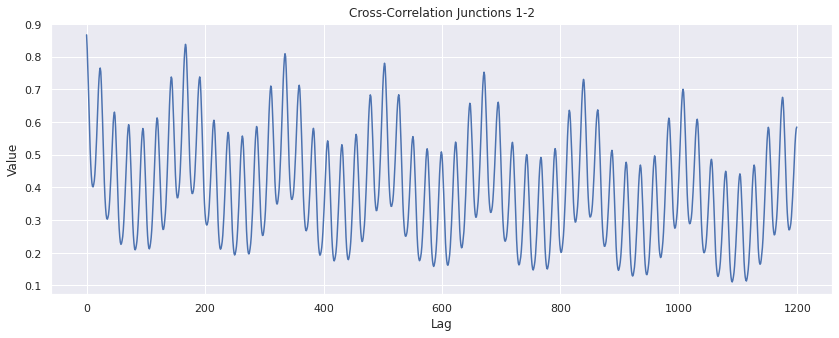

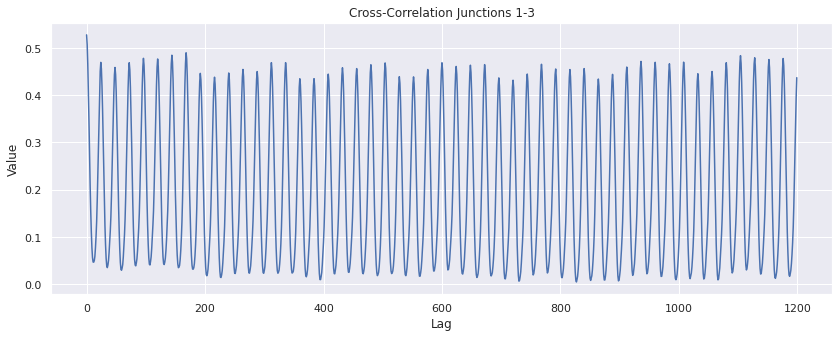

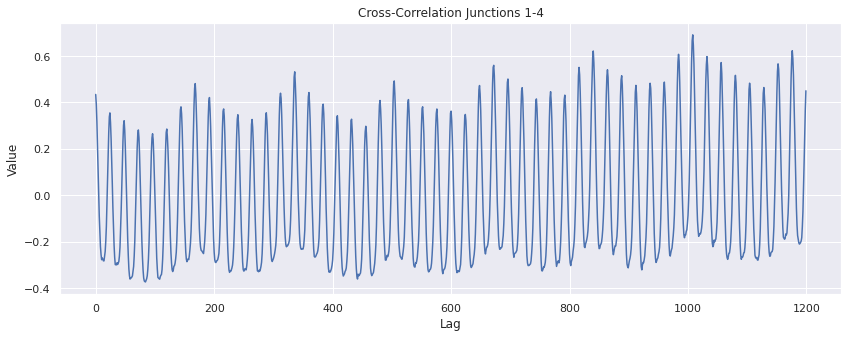

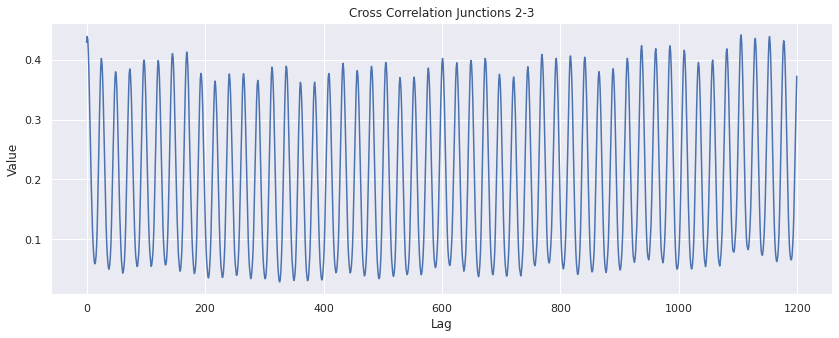

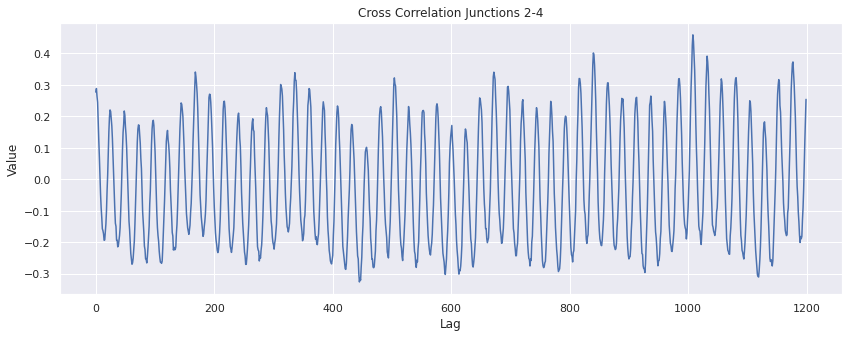

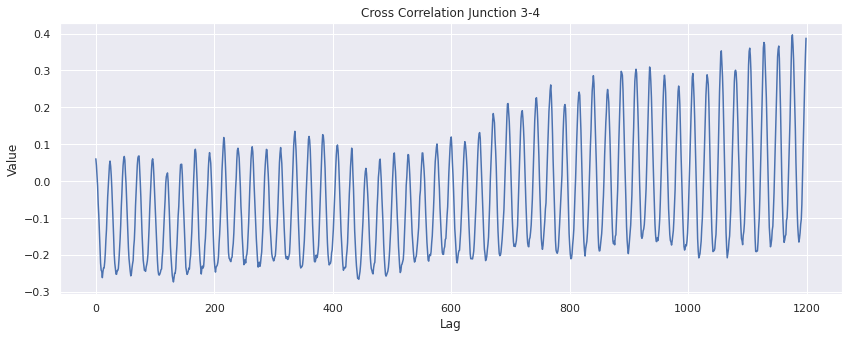

In [29]:
#cross
sns.set()
plt.xlabel("Lag")
plt.ylabel("Value")

plt.plot(sm.tsa.stattools.ccf(j1.Vehicles, j2.Vehicles)[0:1200])
plt.title("Cross-Correlation Junctions 1-2")
plt.xlabel("Lag")
plt.ylabel("Value")
plt.show()

plt.plot(sm.tsa.stattools.ccf(j1.Vehicles, j3.Vehicles)[0:1200])
plt.title("Cross-Correlation Junctions 1-3")
plt.xlabel("Lag")
plt.ylabel("Value")
plt.show()

plt.plot(sm.tsa.stattools.ccf(j1.Vehicles[0:2400], j4.Vehicles[0:2400])[0:1200])
plt.title("Cross-Correlation Junctions 1-4")
plt.xlabel("Lag")
plt.ylabel("Value")
plt.show()

plt.plot(sm.tsa.stattools.ccf(j2.Vehicles, j3.Vehicles)[0:1200])
plt.title("Cross Correlation Junctions 2-3")
plt.xlabel("Lag")
plt.ylabel("Value")
plt.show()

plt.plot(sm.tsa.stattools.ccf(j2.Vehicles[0:2400], j4.Vehicles[0:2400])[0:1200])
plt.title("Cross Correlation Junctions 2-4")
plt.xlabel("Lag")
plt.ylabel("Value")
plt.show()

plt.plot(sm.tsa.stattools.ccf(j3.Vehicles[0:2400], j4.Vehicles[0:2400])[0:1200])
plt.title("Cross Correlation Junction 3-4")
plt.xlabel("Lag")
plt.ylabel("Value")
plt.show()

# to understand how the prices of two or more stocks—or other assets—perform against one another

In [30]:
seaj = [j1, j2, j3]

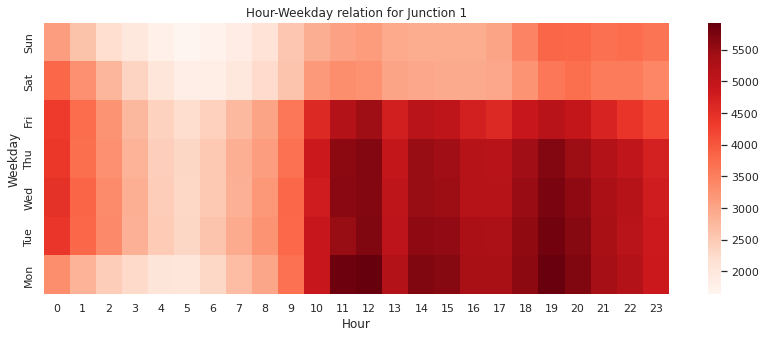

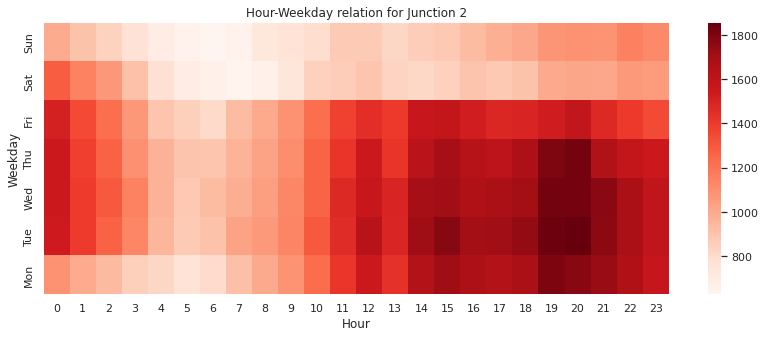

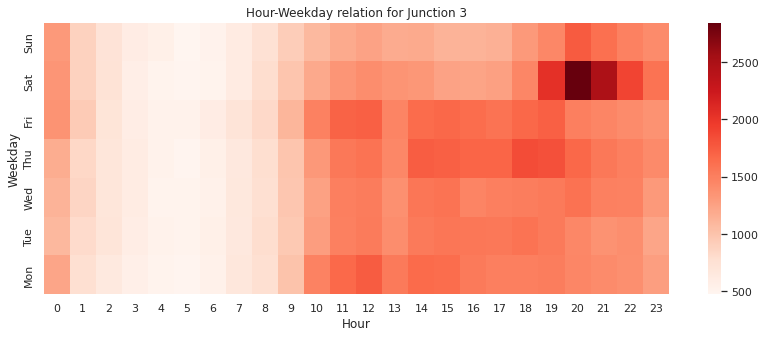

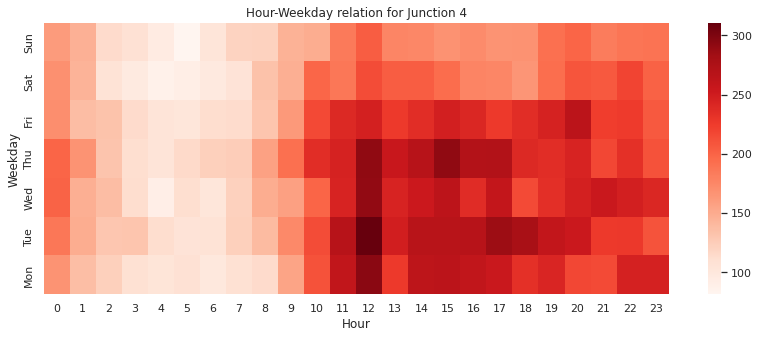

In [31]:
for i,j in enumerate(js):
    j_map = j[["Weekday","Hour","Vehicles"]]
    j_map = j_map.pivot_table(index='Weekday',columns='Hour',aggfunc=sum)
    Cols = range(24)
    Index = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    j_map = pd.DataFrame(data=j_map.to_numpy(),index=Index, columns=Cols)
    ax = sns.heatmap(j_map,cmap="Reds")
    ax.set(xlabel='Hour', ylabel='Weekday')
    ax.set_title('Hour-Weekday relation for Junction %d'%(i+1))
    ax.invert_yaxis()
    plt.show()

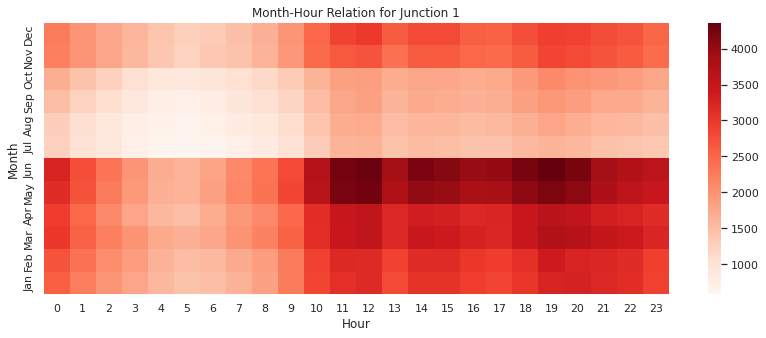

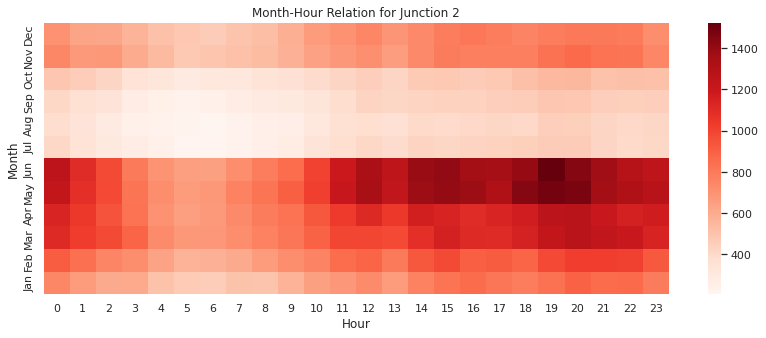

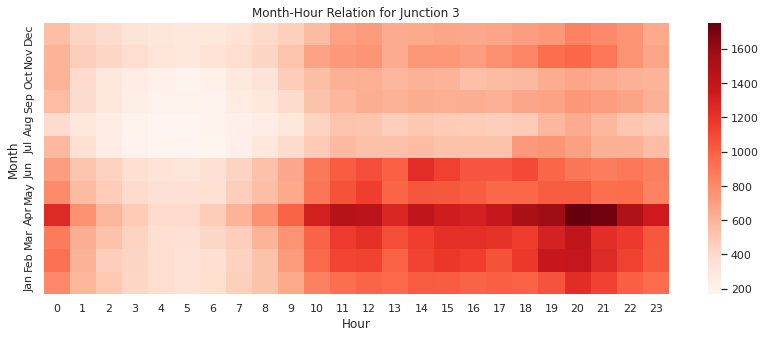

In [32]:
for i,j in enumerate(seaj):
    j_map = j[["Month","Hour","Vehicles"]]
    j_map = j_map.pivot_table(index='Month',columns='Hour',aggfunc=sum)
    Cols = range(24)
    Index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    j_map = pd.DataFrame(data=j_map.to_numpy(),index=Index, columns=Cols)
    ax = sns.heatmap(j_map,cmap="Reds")
    ax.set(xlabel='Hour', ylabel='Month')
    ax.set_title('Month-Hour Relation for Junction %d'%(i+1))
    ax.invert_yaxis()
    plt.show()

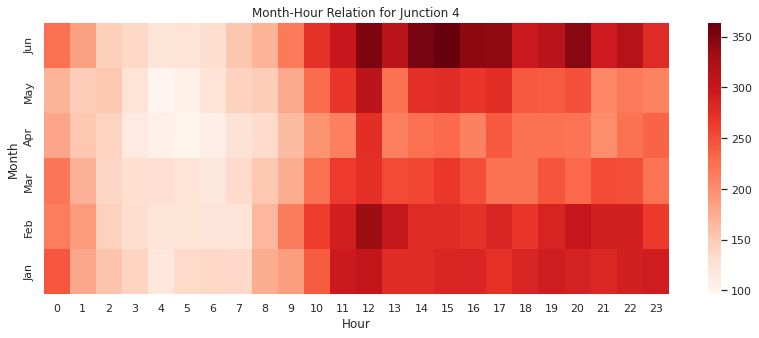

In [33]:
j_map = j4[["Month","Hour","Vehicles"]]
j_map = j_map.pivot_table(index='Month',columns='Hour',aggfunc=sum)
Cols = range(24)
Index = ["Jan","Feb","Mar","Apr","May","Jun"]
j_map = pd.DataFrame(data=j_map.to_numpy(),index=Index, columns=Cols)
ax = sns.heatmap(j_map,cmap="Reds")
ax.set(xlabel='Hour', ylabel='Month')
ax.set_title('Month-Hour Relation for Junction 4')
ax.invert_yaxis()
plt.show()

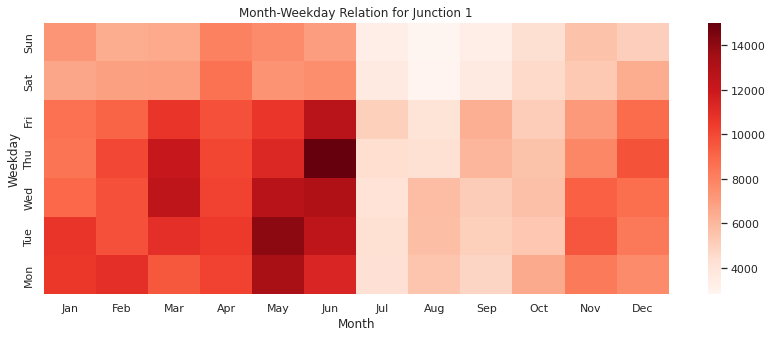

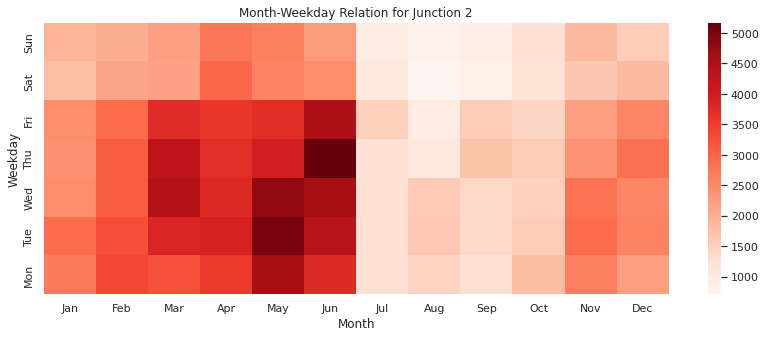

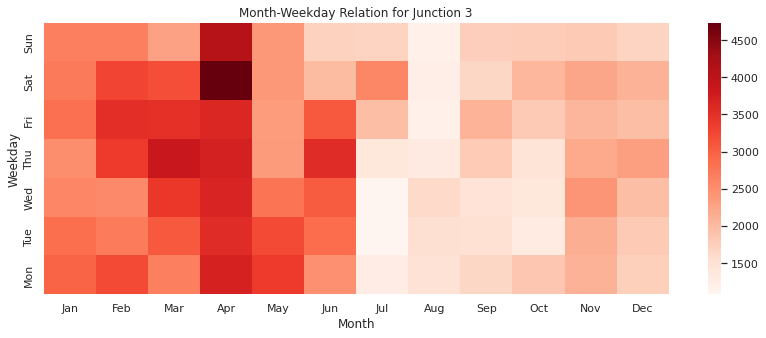

In [34]:
for i,j in enumerate(seaj):
    j_map = j[["Weekday","Month","Vehicles"]]
    j_map = j_map.pivot_table(index='Weekday',columns='Month',aggfunc=sum)
    Cols = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    Index = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    j_map = pd.DataFrame(data=j_map.to_numpy(),index=Index, columns=Cols)
    ax = sns.heatmap(j_map,cmap="Reds")
    ax.set(xlabel='Month', ylabel='Weekday')
    ax.set_title('Month-Weekday Relation for Junction %d'%(i+1))
    ax.invert_yaxis()
    plt.show()

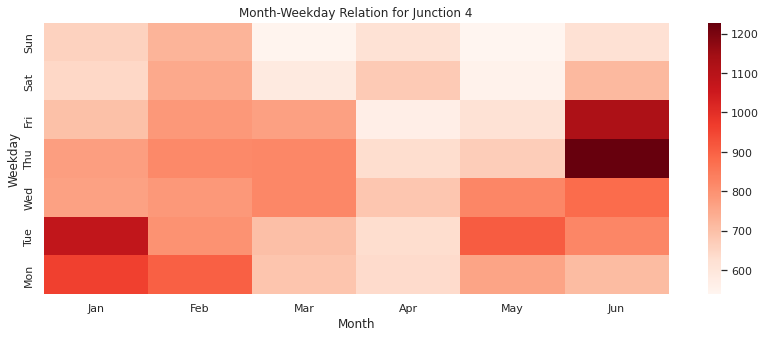

In [35]:
j4_map = j4[["Weekday","Month","Vehicles"]]
j4_map = j4_map.pivot_table(index='Weekday',columns='Month',aggfunc=sum)
Cols = ["Jan","Feb","Mar","Apr","May","Jun"]
Index = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
j4_map = pd.DataFrame(data=j4_map.to_numpy(),index=Index, columns=Cols)
ax = sns.heatmap(j4_map,cmap="Reds")
ax.set(xlabel='Month', ylabel='Weekday')
ax.set_title('Month-Weekday Relation for Junction 4')
ax.invert_yaxis()